In [90]:
#### Import the package

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'numpy'

In [4]:
df=pd.read_csv("hotel_bookings.csv")

NameError: name 'pd' is not defined

In [3]:
df.shape

(119390, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
## for missing
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### there are 488 missing values in country(object)
#### there are 4 missing values in children(float
#### There are 16340 missing values in agent (float)
#### There are 112593 mising values in company(float) and dropping of becauese of more missing values

In [6]:
df=df.drop(["company"],axis=1)

In [7]:
df.shape  # as u can see column was earlier 32 and now 31

(119390, 31)

## snbr:-
#### Snrbr:- float value can  change by mean/median. while object value can change using mode only

## Missing values

In [8]:
median1=df["children"].median()
median1

0.0

In [9]:
mean1=df["children"].mean()  # mean value is good in respect to median1. so i willc hange into mean
mean1            

0.10388990333874994

In [10]:
df["children"].replace(np.nan,mean1,inplace=True) # nan means null values

In [11]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [12]:
#### children is zero in the above the  given data

In [13]:
# now we will check agent value beacuse agent is numerical
# and main motive to makes the numerical(that is missing) value in zero

In [14]:
median2=df["agent"].median() # in colon 6 agent is in float . and float value can be change by mean /median
median2


14.0

In [15]:
df["agent"].replace(np.nan,median2,inplace=True)

In [16]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [17]:
## now for country there is 488 missing values
## so make that value to zero


In [18]:
mode1=df["country"].mode().values[0] ## for mode only write .values[0]
mode1                                          # from colon 6.. that is object and for object we calculate by mode

'PRT'

In [19]:
df["country"].replace(np.nan,mode1,inplace=True)

In [20]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

## Check for duplicates in our data set

In [21]:
duplicate=df.duplicated() ## so there is 32020 duplicate in my data
print(duplicate.sum())

32020


In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()# df=(data framef) object has no attribute "duplicates"but duplicated is availabel

0

In [24]:
df.duplicated().sum()

0

In [25]:
df.shape

(87370, 31)

<AxesSubplot:>

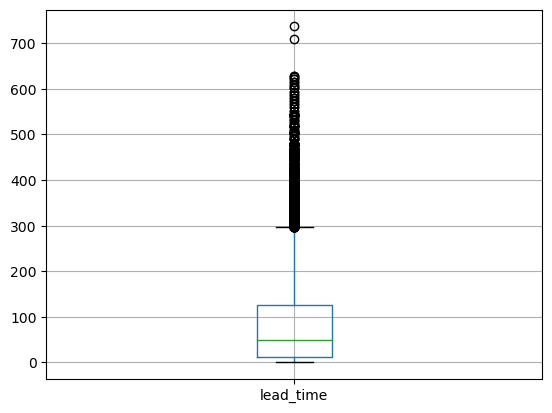

In [26]:
# outlier , Blue line just above the zero is the min value(and also Q1, is the minimum value, above Q1 is Q2, then Q3),maximum value(is just below the  dark rod like color below 400 is the mximum value)

df.boxplot(column=["lead_time"])

#### for above diagrram:- basically outliers are the  dark band. for remove we remove that dark band
##### Q1-1.5IQR,Q3+1.5IQR,( for more detaills see the seesion 4)

In [27]:
def remove_outlier(col): # To remove the outliers:
    
    sorted(col)
    Q1,Q3 =col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [28]:
low_leadtime,high_leadtime=remove_outlier(df["lead_time"])
df["lead_time"]=np.where(df["lead_time"]>high_leadtime,high_leadtime,df["lead_time"])
df["lead_time"]=np.where(df["lead_time"]<low_leadtime,low_leadtime,df["lead_time"])

In [2]:
df.boxplot(column=["lead_time"]) ## here will be a graph with no outlier(dark band))) but not showing i dont know


NameError: name 'df' is not defined

####  Now, catogorical attributes into numberr( basically callled as one hot encoding)


#### ## Only object data tpes our code can not work that the reason we convert the code in number

In [30]:
# one hot encoding
df=pd.get_dummies(df,columns=['reservation_status','hotel','arrival_date_month','reservation_status_date','custumer_type','deposit'])

KeyError: "['custumer_type', 'deposit'] not in index"

In [1]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df

In [ ]:
df.shape

# time 1;22, after that  maa'am shared  a data of diebetes data sheet

#### There are missing values:
   ##### preg=pregnancy,pres=pressure,mass=bmi,test=insulin,skin=thickness
   
   
   ## in class- 0 means diabeti ,1 means non diabettics

In [ ]:
## till 5th  session yhillss